# 911 Calls analysis.

In [95]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

%matplotlib inline

In [59]:
df= pd.read_csv("911.csv")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [61]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Data cleaning and preprocessing

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [63]:
df.shape

(99492, 9)

In [64]:
df.isna().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [65]:
df.dropna(inplace=True)

In [66]:
df.isna().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

In [67]:
df.duplicated().sum()

0

In [68]:
df["timeStamp"].dtypes 

dtype('O')

In [69]:
df["timeStamp"]=pd.to_datetime(df["timeStamp"])

In [70]:
type(df["timeStamp"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

# EDA

Top 5 zip for calls

In [98]:
df["zip"].value_counts().head(5)

19401.0    6977
19464.0    6641
19403.0    4854
19446.0    4745
19406.0    3173
Name: zip, dtype: int64

Top 5 township for calls.

In [72]:
df["twp"].value_counts().head()

LOWER MERION    7202
ABINGTON        5675
NORRISTOWN      5610
POTTSTOWN       4029
CHELTENHAM      3942
Name: twp, dtype: int64

In [73]:
df["title"].nunique()

107

In [74]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

Most frequest reason for calls.

In [76]:
df["Reason"].value_counts()

EMS        44318
Traffic    29254
Fire       13004
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

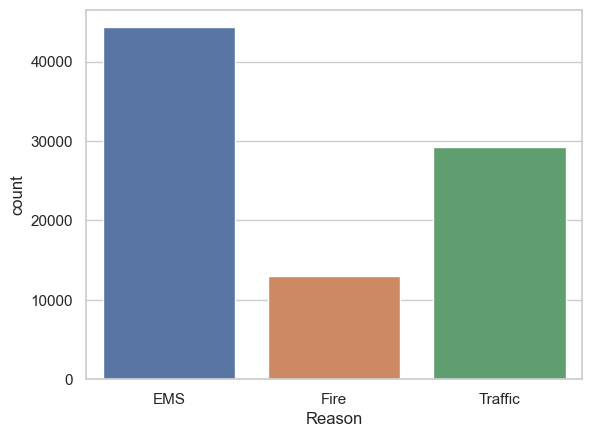

In [45]:
sns.countplot(x=df["Reason"])


In [77]:
df["timeStamp"].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [78]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [79]:
df["Day of Week"]

0        3
1        3
2        3
3        3
5        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 86576, dtype: int64

In [82]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [83]:
df['Day of Week'] = df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

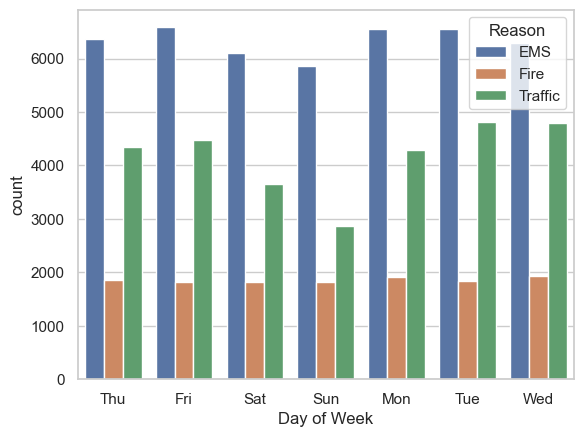

In [84]:
sns.countplot(x=df["Day of Week"], hue=df["Reason"])


<AxesSubplot:xlabel='Month', ylabel='count'>

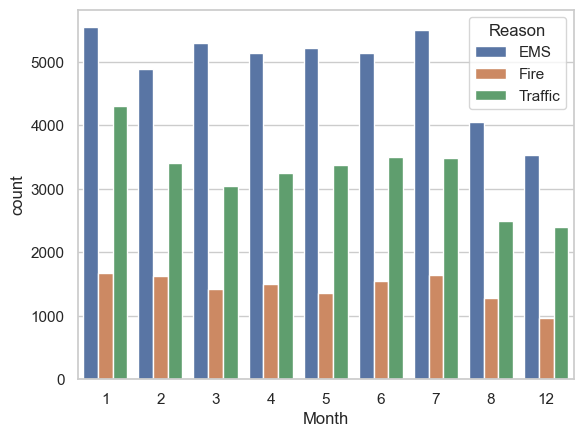

In [85]:
sns.countplot(x=df["Month"], hue=df["Reason"])

In [90]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
2,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926
3,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753
4,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893
5,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939


<AxesSubplot:xlabel='Month'>

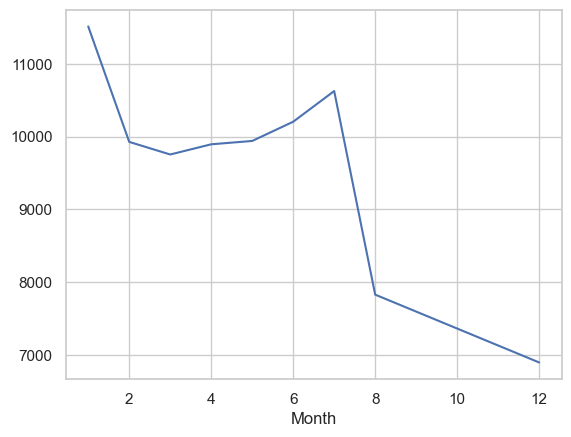

In [91]:
byMonth['twp'].plot()

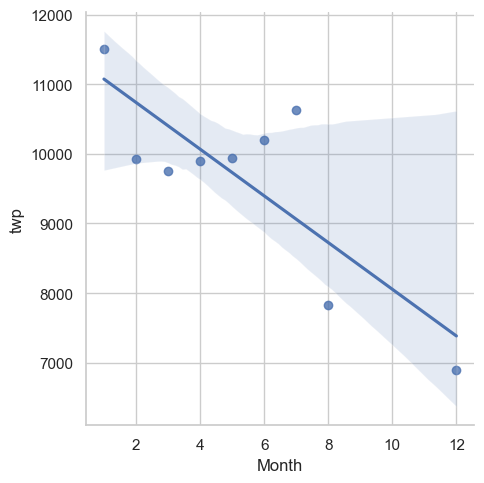

In [92]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

Below are the finding from the analysis. 

In [ ]:
The most frequent zip code are : 
6977
6641
4854
4745
3173
    